In [3]:
import pandas as pd
import json
import time 
from collections import Counter
    

In [46]:
with open('pubag_abs_dict.json', 'r') as read_file:
    abstract_dict = json.load(read_file)

start_len = len(abstract_dict['id'])
keywords = "convolutional+neural+networks+wheat"
#put convolutional neural network. CNN stands for Cheyenne or aminés (chemistry) etc
response = requests.get("https://api.nal.usda.gov/pubag/rest/search/?query={}&per_page=100&api_key={}".format(keywords, API_KEY)).json()
totalpages = response["request"]["totalPages"]

for i in range (totalpages):
    response = requests.get("https://api.nal.usda.gov/pubag/rest/search/?query={}&page={}&per_page=100&api_key={}".format(keywords, i+1, API_KEY)).json()
    for j in range (len(response['resultList'])):
        abs_id = response['resultList'][j]['id']
        if abs_id not in abstract_dict['id']:
            try:
                abstract_dict['id'].append(abs_id)
                abstract_dict['titles'].append(response['resultList'][j]['title'])
                abstract_dict['abstracts'].append(response['resultList'][j]['abstract'])
                abstract_dict['authors'].append((response['resultList'][j]['author']))
                abstract_dict['keywords'].append((keywords))
                abstract_dict['subject'].append((response['resultList'][j]['subject']))
                abstract_dict['date'].append((response['resultList'][j]['date']))
                abstract_dict['sources'].append((response['resultList'][j]['journal']))
            except:
                print(abs_id, " didn't work")
end_len = len(abstract_dict['id'])

print("added {} abstracts".format(end_len-start_len))


with open('pubag_abs_dict.json', 'w+') as f:
    json.dump(abstract_dict, f) 

added 950 abstracts


In [4]:
with open('pubag_abs_dict.json', 'r') as read_file:
    abstract_dict = json.load(read_file)
print(len(abstract_dict['id']))

abstract_df = pd.DataFrame.from_dict(abstract_dict)
abstract_df.head()
print(abstract_df.shape)





973
(973, 8)


0.04189944267272949


/home/martin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


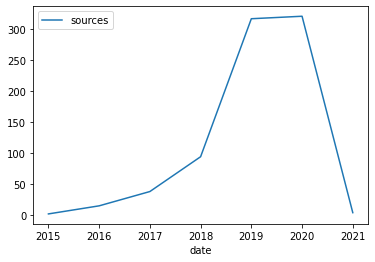

In [11]:
start = time.time()
inter_df = abstract_df[abstract_df['abstracts'].str.contains("convolutional")]
inter_df.head()



years = list(inter_df['date'])
for i in range (len(years)):
    years[i] = years[i][:4]
inter_df['date'] = years
inter_df = inter_df.drop(columns =["id", "titles", "abstracts", "authors", "keywords", "subject"])
inter_df.groupby('date').count().plot()
end = time.time()
print(end-start)

0.134993314743042


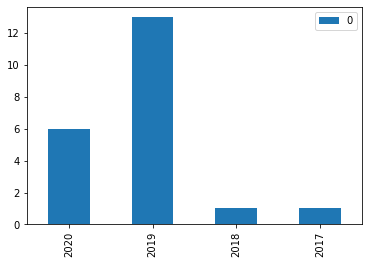

In [6]:
start = time.time()
indices = [i for i, x in enumerate(abstract_dict["abstracts"]) if "wheat" in x]
dates = [int(x[:4]) for i, x in enumerate(abstract_dict["date"]) if i in indices]

year_counts = Counter(dates)
year_df = pd.DataFrame.from_dict(year_counts, orient='index')
year_df.plot(kind='bar')
end = time.time()
print(end-start)